In [223]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df = pd.read_csv(r"C:\Users\Ravi Teja\Desktop\Datasets\ipldata\matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Winning team data frame is taken from original dataframe

In [225]:
win_df = df[['team1','team2','winner']]
win_df.head()

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


### List of Teams:

In [226]:
teams = df.team1.unique()
print(teams)

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


### Calculating win percentage

In [227]:
winPercent = []
      
for each_team in teams:
    played_matches = np.count_nonzero(df['team1'].astype(str).str.contains(each_team)) + np.count_nonzero(df['team2'].astype(str).str.contains(each_team))
    matches_won = np.count_nonzero(df['winner'].astype(str).str.contains(each_team))   
    winPercent.append(100 * (matches_won / played_matches))


### Win percantage for every team in tabular form

In [228]:
 win = pd.DataFrame({'Team': teams, 'Win Percantge': winPercent})
print (win)

                           Team  Win Percantge
0           Sunrisers Hyderabad      55.913978
1                Mumbai Indians      57.309942
2                 Gujarat Lions      43.333333
3        Rising Pune Supergiant      50.000000
4   Royal Challengers Bangalore      47.590361
5         Kolkata Knight Riders      52.439024
6              Delhi Daredevils      41.614907
7               Kings XI Punjab      46.913580
8           Chennai Super Kings      61.224490
9              Rajasthan Royals      52.631579
10              Deccan Chargers      38.666667
11         Kochi Tuskers Kerala      42.857143
12                Pune Warriors      26.086957
13      Rising Pune Supergiants      35.714286


### Plot to show all the in percentages:

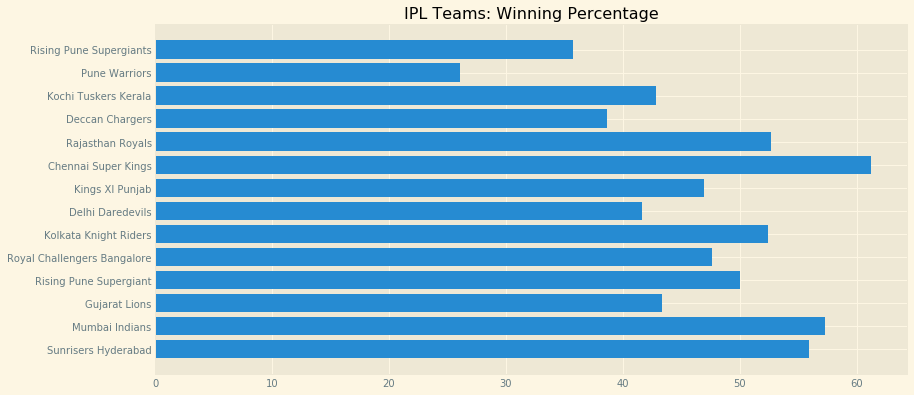

In [229]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,6))
plt.barh(range(len(winPercent)), winPercent, align='center')
plt.yticks(range(len(winPercent)), teams)
plt.title("IPL Teams: Winning Percentage")
plt.show()

### Sorting and plotting according to Win percentage

In [230]:
winPercent, teams = zip(*sorted(zip(winPercent, teams)))

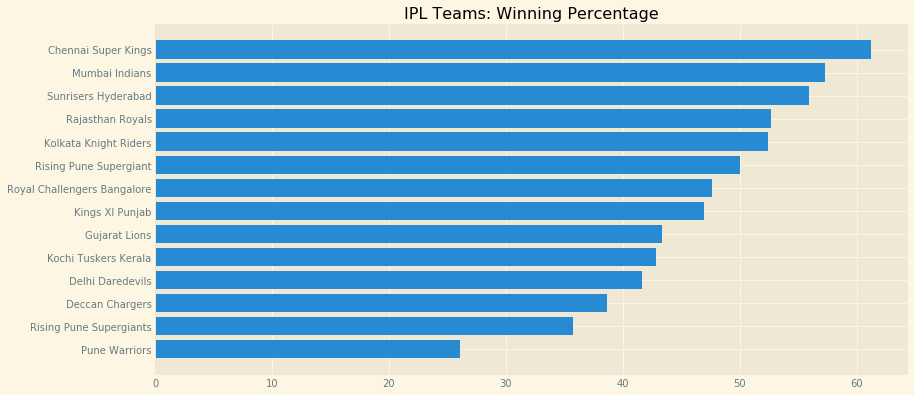

In [231]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,6))
plt.barh(range(len(winPercent)), winPercent, align='center')
plt.yticks(range(len(winPercent)), teams)
plt.title("IPL Teams: Winning Percentage")
plt.show()

### Does toss really matter? 

In [232]:
toss_df = df[['toss_winner','winner']]
toss_df.head()

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore


In [233]:
#counting the total matches
toss_df.count()

toss_winner    696
winner         693
dtype: int64

In [234]:
#cleaning the data by dropping empty rows
toss_df1 = toss_df.dropna()
toss_df1.count()

toss_winner    693
winner         693
dtype: int64

In [235]:
#Count of the matches where toss winner won the match
toss_df1[toss_df1.winner == toss_df1.toss_winner].count()
            

toss_winner    357
winner         357
dtype: int64

In [236]:
#Count of the matches where toss loser won the match
toss_df1[toss_df1.winner != toss_df1.toss_winner].count()

toss_winner    336
winner         336
dtype: int64

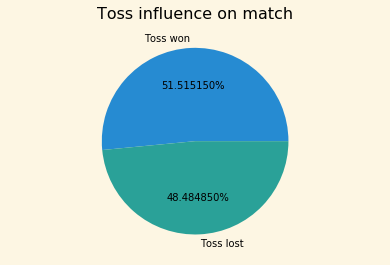

In [250]:
x_list = [357, 336]
label_list = ["Toss won", "Toss lost"]

plt.axis("equal")
plt.pie(x_list,
        labels=label_list, autopct = '%f%%')
plt.title("Toss influence on match")
plt.show()

#### So from the above data we can conclude that toss does not influence the chance of winning the match

### Most matches won

Here let us look at the visual representation of matches won by each team

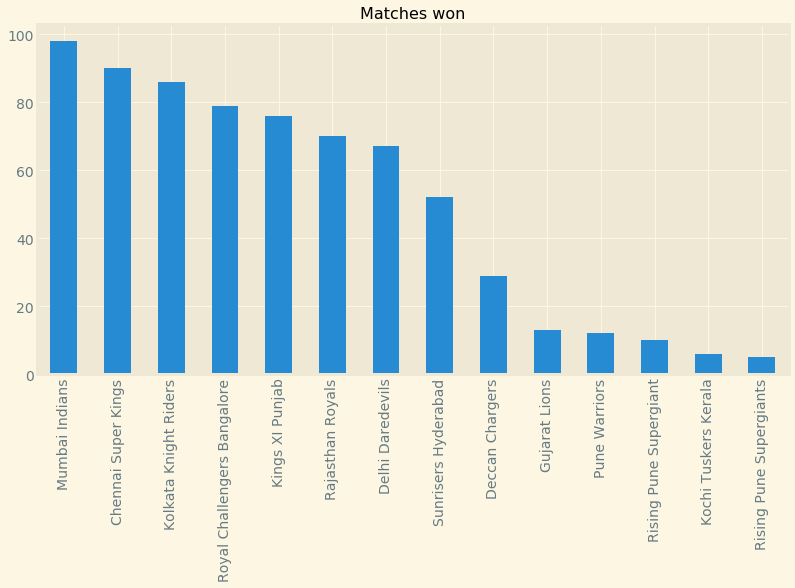

In [283]:
df['winner'].value_counts().plot.bar(figsize=(12, 6),title='Matches won')
plt.style.use('Solarize_Light2')
plt.show()

### Most "Player of the Match awards"

From this dataset, we can understand the performances of individual players and can rate the best of lot

Make a list with player and append all the players of the matches into it

In [342]:
# making a list and using list comprehension to get a list of player of the matches
player = []
for i in df.player_of_match:
       player.append(i)

In [343]:
#importing counter from collections
from collections import Counter

In [300]:
#using counter to count no. of awards each player got and listing out the highest ones
X = (Counter(player))
X.most_common(10)

[('CH Gayle', 20),
 ('AB de Villiers', 18),
 ('RG Sharma', 16),
 ('YK Pathan', 16),
 ('DA Warner', 15)]

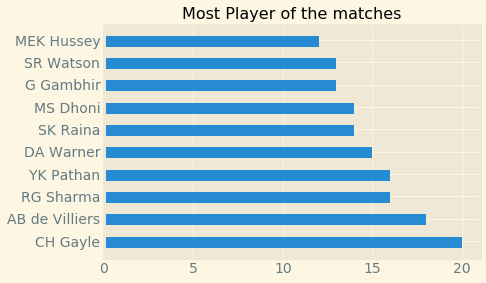

In [348]:
# listing out the best players and a visual representation of no. of awards
labels, values = zip(*X.most_common(10))
indexes = np.arange(len(labels))
width = 0.5

plt.barh(indexes, values, width)
plt.title('Most Player of the matches')
plt.yticks(indexes + width * 0.1, labels)
plt.show()